# Analyse du dataset
**Vous y trouverez une description complète de la base ainsi qu'une analyse orientée sur les retards.**

# 1 - Découverte de la base

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Affichage de toute les colonnes
pd.set_option('display.max_columns', None)

# Ignorer les avertissements FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Path vers la base Kaggle
link_path = "/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/US_flights_2023.csv"

# Import flights dataset
df_flight = pd.read_csv(link_path)

# Typage de la colonne FlightDate au format datetime
df_flight['FlightDate'] = pd.to_datetime(df_flight['FlightDate'])

# Ajout d'une clé primaire unique en dur
df_flight = df_flight.reset_index(drop =False)

# Affichage des 10 premières lignes
df_flight.head(10)

,index,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,LGA,"New York, NY",-12,Low <5min,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,LGA,"New York, NY",-8,Low <5min,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,LGA,"New York, NY",-21,Low <5min,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,LGA,"New York, NY",-17,Low <5min,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,LGA,"New York, NY",-16,Low <5min,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
5,5,2023-01-07,6,Endeavor Air,N336PQ,BDL,"Hartford, CT",Morning,-10,0,Low <5min,LGA,"New York, NY",-13,Low <5min,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
6,6,2023-01-14,6,Endeavor Air,N311PQ,LGA,"New York, NY",Afternoon,-8,0,Low <5min,CVG,"Cincinnati, OH",-31,Low <5min,117,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
7,7,2023-01-21,6,Endeavor Air,N917XJ,LGA,"New York, NY",Afternoon,-10,0,Low <5min,CVG,"Cincinnati, OH",-25,Low <5min,125,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
8,8,2023-01-28,6,Endeavor Air,N336PQ,LGA,"New York, NY",Afternoon,-5,0,Low <5min,CVG,"Cincinnati, OH",-15,Low <5min,130,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
9,9,2023-01-09,1,Endeavor Air,N491PX,LGA,"New York, NY",Evening,-7,0,Low <5min,BGM,"Binghamton, NY",-3,Low <5min,63,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,4


In [21]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   FlightDate          datetime64[ns]
 2   Day_Of_Week         int64         
 3   Airline             object        
 4   Tail_Number         object        
 5   Dep_Airport         object        
 6   Dep_CityName        object        
 7   DepTime_label       object        
 8   Dep_Delay           int64         
 9   Dep_Delay_Tag       int64         
 10  Dep_Delay_Type      object        
 11  Arr_Airport         object        
 12  Arr_CityName        object        
 13  Arr_Delay           int64         
 14  Arr_Delay_Type      object        
 15  Flight_Duration     int64         
 16  Distance_type       object        
 17  Delay_Carrier       int64         
 18  Delay_Weather       int64         
 19  Delay_NAS           int64         
 20  De

**Le dataset comporte 6.743.403 lignes et 24 colonnes.**
- 12 colonnes au format 'int'
- 13 colonnes au format 'objet' dont la colonne DateFlight'
- Taille du dataset : 1.2 GB

In [22]:
df_flight.isnull().sum()

index                 0
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
dtype: int64

**Pas de présence de valeurs Nulls**

In [23]:
df_flight.select_dtypes('object').describe(include = 'all').T

,count,unique,top,freq
Airline,6743404,15,Southwest Airlines Co.,1421238
Tail_Number,6743404,5963,N488HA,3327
Dep_Airport,6743404,350,ATL,332935
Dep_CityName,6743404,344,"Chicago, IL",338766
DepTime_label,6743404,4,Morning,2611567
Dep_Delay_Type,6743404,3,Low <5min,5409737
Arr_Airport,6743404,350,ATL,332941
Arr_CityName,6743404,344,"Chicago, IL",338319
Arr_Delay_Type,6743404,3,Low <5min,5403727
Distance_type,6743404,3,Short Haul >1500Mi,5872159


**Analyse des colonnes de type catégorielle :**

- **Airline** : contient le noms des **15 compagnies** présentent dans le dataset
- **Tail_Number** : identifiant unique de l'avion. **5963 avions** sont présents
- **Dep_Airport** : Identifiant unique de chaque aéroport de départ. **350 aéroports** sont représentés
- **Dep_CityName** : Noms des villes de départ. **344 villes** sont représentées
- **DepTime_label** : Découpage de la journée par période de 6h (Night - Morning - Afternoon - Evening)
- **Dep_Delay_Type** : 3 categories de retards au départs (Low <5min - Medium >15min - Hight >60min)       
- **Arr_Airport** : Identifiant unique de chaque aéroport d'arrivée. 350 aéroports sont représentés          
- **Arr_CityName** : Noms des villes d'arrivée. 344 villes sont représentées
- **Arr_Delay_Type** : 3 categories de retards a l'arrivée (Low <5min - Medium >15min - Hight >60min) 
- **Distance_type** : 3 categories de vols en miles parcourues (Short Haul >1500Mi', 'Medium Haul <3000Mi', 'Long Haul <6000Mi)
- **Manufacturer** : Constructeur de l'avion. **5 constructeurs d'avions présents**      
- **Model** : Nom de modèle donné par le constructeur. 21 modèles d'avions présents  

In [24]:
df_flight.describe().T

,count,mean,min,25%,50%,75%,max,std
index,6743404.0,3371701.5,0.0,1685850.75,3371701.5,5057552.25,6743403.0,1946653.201665
FlightDate,6743404,2023-07-04 07:06:16.929396480,2023-01-01 00:00:00,2023-04-06 00:00:00,2023-07-06 00:00:00,2023-10-02 00:00:00,2023-12-31 00:00:00,NaN
Day_Of_Week,6743404.0,3.982793,1.0,2.0,4.0,6.0,7.0,2.001762
Dep_Delay,6743404.0,12.200987,-99.0,-5.0,-2.0,9.0,4413.0,55.079361
Dep_Delay_Tag,6743404.0,0.379001,0.0,0.0,0.0,1.0,1.0,0.485138
Arr_Delay,6743404.0,6.627152,-119.0,-15.0,-6.0,9.0,4405.0,57.078921
Flight_Duration,6743404.0,140.297779,0.0,87.0,124.0,171.0,795.0,72.872157
Delay_Carrier,6743404.0,5.169804,0.0,0.0,0.0,0.0,3957.0,36.457324
Delay_Weather,6743404.0,0.74285,0.0,0.0,0.0,0.0,1860.0,14.353928
Delay_NAS,6743404.0,2.566957,0.0,0.0,0.0,0.0,1708.0,15.004842


**Analyse des colonnes de type numérique :**

- **index** : id unique du vol (primary key)
- **Day_Of_Week** : contient les jours de la semaine de 1 à 7
- **Dep_Delay** : Retard au décollage de -99 minutes a 4413 minutes avec une moyenne de 12.20 minutes
- **Dep_Delay_Tag** : Tag de retard ou 1 représente un retard de plus de 5 min 
- **Arr_Delay** : Retard a l'attérissage de -119 minutes à 4405 minutes avec une moyenne de 6.62 minutes
- **Flight_Duration** : Durée du vol de 0 à 795 minutes avec une moyenne de 140 minutes
- **Delay_Carrier** : Retards causés par la compagnie aérienne de 0 minutes a 3957 minutes 
- **Delay_Weather** : Retards liés a la météo de 0 à 1860 minutes
- **Delay_NAS** : Retards liés au controleur aérien de 0 à 1708 minutes
- **Delay_Security** : Retards liés aux controles de sécurité de 0 à 1460 minutes
- **Delay_LastAircraft**: Retards liés a l'attente de l'avion de 0 à 3581 minutes
- **Aicraft_age** : Age de l'avion de 1 à 57 ans avec une moyenne de 13.48 ans

**On observe de nombreuses valeurs extrèmes**, ou hors normes, mais après vérification il s'agit de données réels. Je n'interviens pas sur ces données pour ne pas biaiser les résultats.

**On observe aussi un premier lien de dépendance** a confirmer entre les **retards au décolage** et les **retards a l'attérissage**.

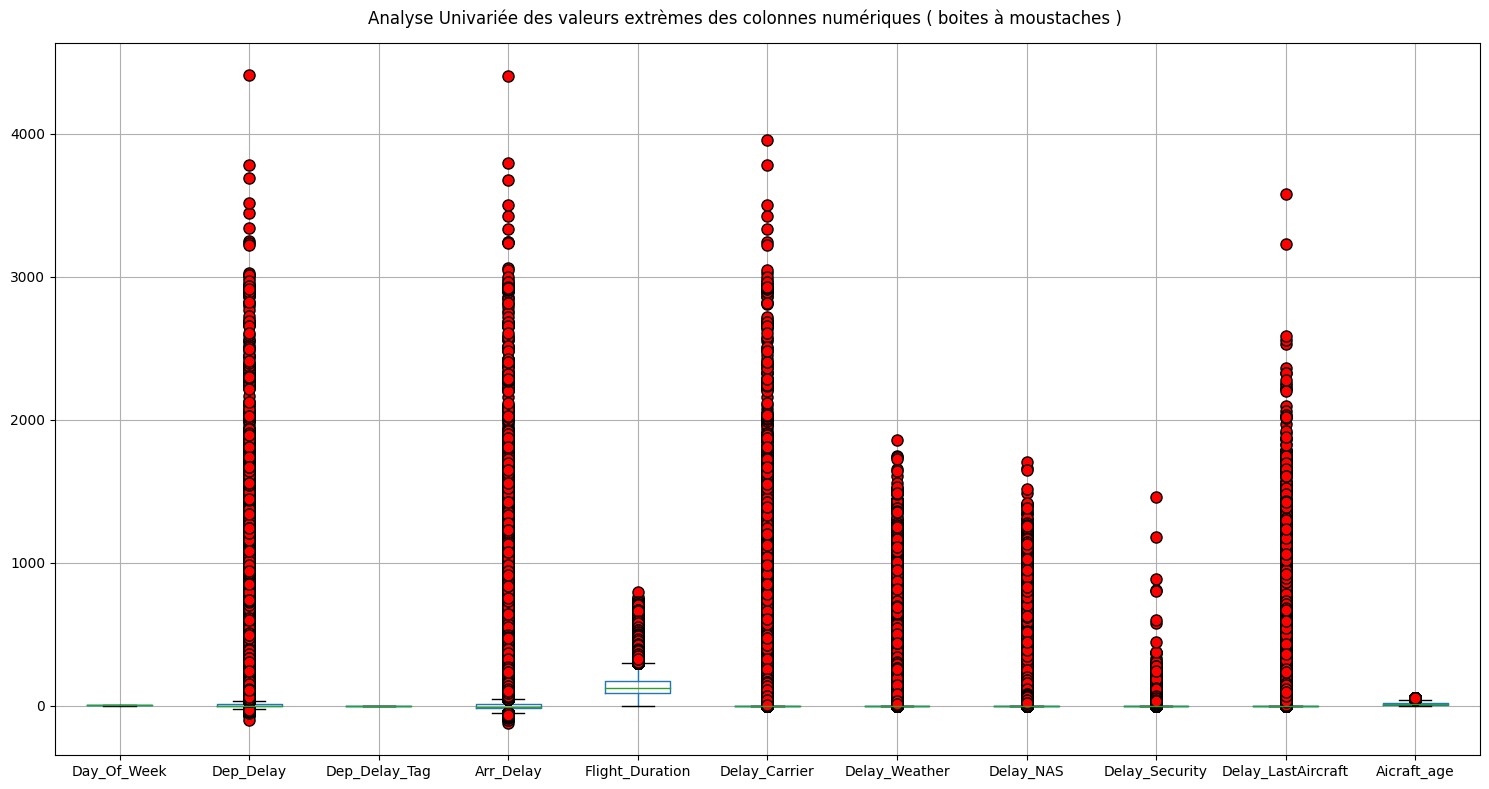

In [28]:
# Sélection des colonnes numériques à inclure dans le tracé (hors 'index')
numeric_columns = df_flight.select_dtypes(include=['int64', 'float64']).drop(columns=['index'])

# Boites a moustaches des données numériques avec outliers en rouges
numeric_columns.boxplot(figsize=(15, 8),flierprops=dict(marker='o', markerfacecolor='r', markersize=8))

plt.suptitle('Analyse Univariée des valeurs extrèmes des colonnes numériques ( boites à moustaches )')

plt.tight_layout()
plt.show()

# 2 - Les données chiffrées

**Context général :**

In [6]:
# Nombre de vols
flight_count = len(df_flight)

print(f"- On dénombre {flight_count} vols sur la période 2023, soit {round(flight_count/1000000,2)} Millions.")
print(f"- Cela représente en moyenne {round((flight_count/365)/1000,2)}k vols par jour sur la période 2023.")

print(f"- L'age moyen des avions est de {round(df_flight['Aicraft_age'].mean(),2)} ans.")

print(f"- Le nombre total d'heures de vole sur l'année est de {round(df_flight['Flight_Duration'].sum()/60000000,2)} millions heures.")

print(f"- La durée moyenne d'un vol en 2023 est de {round(df_flight['Flight_Duration'].mean()/60,2)} heures.")

- On dénombre 6743404 vols sur la période 2023, soit 6.74 Millions.
- Cela représente en moyenne 18.48k vols par jour sur la période 2023.
- L'age moyen des avions est de 13.48 ans.
- Le nombre total d'heures de vole sur l'année est de 15.77 millions heures.
- La durée moyenne d'un vol en 2023 est de 2.34 heures.


**Distribution des vols par compagnie**

Nous obtenons un ranking des compagnies par nombre de vols effectués en 2023 avec **"Southwest Airlines" en première position avec un taux de présence de 21.08 %**.

La répartition est non uniforme avec un maximum de 21.08 % et un minimum de 1.18 % pour "Hawaiian Airline Inc". Nous notons que **les cinq compagnies les plus actives
représentent a elle seule 70% de l'activité aérienne civil**.

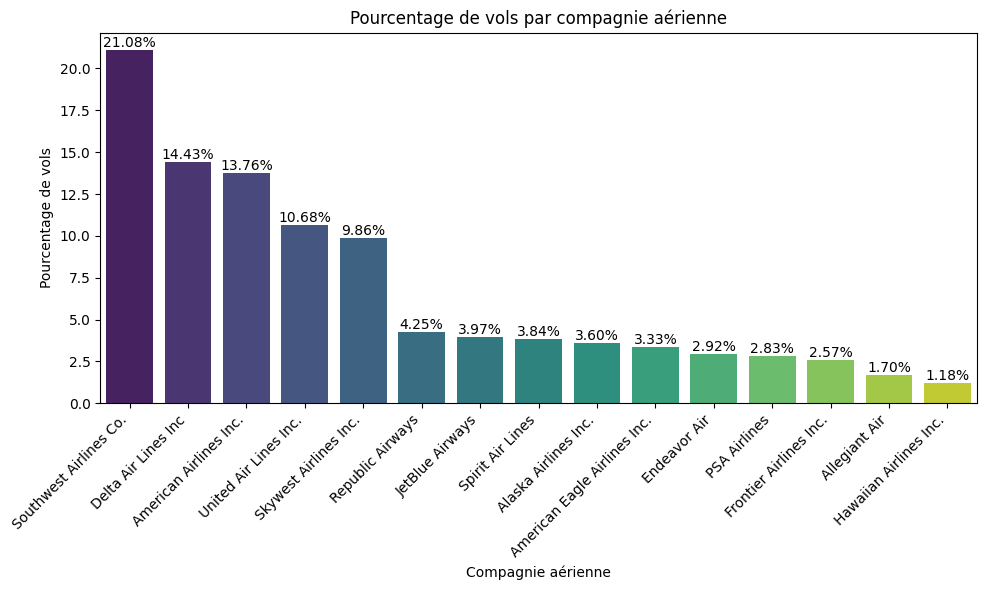

In [28]:
# Calcul du nombre total de vols
total_flights = len(df_flight)

# Calcul du nombre de vols par compagnie aérienne
flight_counts = df_flight['Airline'].value_counts()

# Calcul des pourcentages de vols par compagnie aérienne
flight_percentages = (flight_counts / total_flights) * 100

# Création du graphique à barres avec les pourcentages affichés
plt.figure(figsize=(10, 6))  
sns.barplot(x=flight_percentages.index, y=flight_percentages.values, palette="viridis")  # Création du graphique
plt.title('Pourcentage de vols par compagnie aérienne')
plt.xlabel('Compagnie aérienne')
plt.ylabel('Pourcentage de vols')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
for i, value in enumerate(flight_percentages.values):
    plt.text(i, value, f"{value:.2f}%", ha='center', va='bottom')  # Affichage des pourcentages au-dessus de chaque barre
plt.tight_layout()
plt.show()

**Distribution des vols par jour de la semaine**

Nous découvrons une **répartition uniforme sur les jours de la semaine** avec une légère hausse le jeudi/vendredi (14.8 %) et une legère baisse des volumetries de départs le samedi (12.92%).

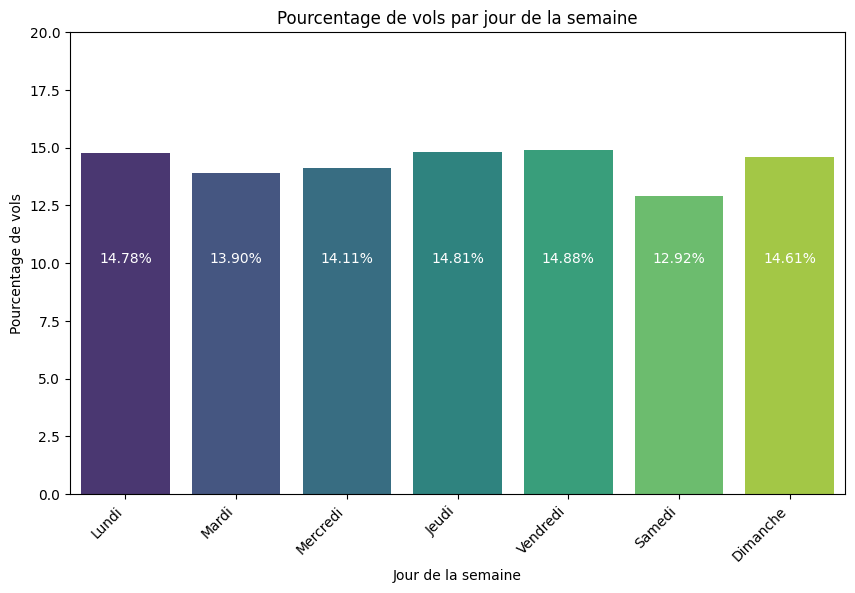

In [33]:
### Calcul du nombre total de vols
total_flights = len(df_flight)

# Calcul du nombre de vols par jour de la semaine
flight_counts = df_flight.groupby('Day_Of_Week')['index'].count()

# Calcul des pourcentages de vols par jour de la semaine
flight_percentages = (flight_counts / total_flights) * 100

# Création du graphique à barres avec les pourcentages affichés en bas et en blanc
plt.figure(figsize=(10, 6))  
sns.barplot(x=flight_percentages.index, y=flight_percentages.values, palette="viridis")  # Création du graphique
plt.title('Pourcentage de vols par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Pourcentage de vols')

# Renommer les abscisses
jours_semaine = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
plt.gca().set_xticklabels(jours_semaine)

plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
for i, value in enumerate(flight_percentages.values):
    plt.text(i, 10, f"{value:.2f}%", ha='center', va='baseline', color='white')  # Affichage des pourcentages en bas de chaque barre en blanc

# Réglage de l'axe y de 0 à 20
plt.ylim(0, 20)

#plt.tight_layout()  # Ajustement automatique de la disposition pour éviter les chevauchements
plt.show()

**Répartition du nombre de vols par constructeur**

**BOEING** représente a lui seule **46.3 % des vols US**. Alors que **AIRBUS cumul 29.39 %** soit un tier de vol en moins. 

**DIAMOND AIRCRAFT n'est pas représenté** dans ce graphique car il s'agit d'un seul avion de tourisme, model DA40, ayant réalisé seulement 3 vols dans l'année. 

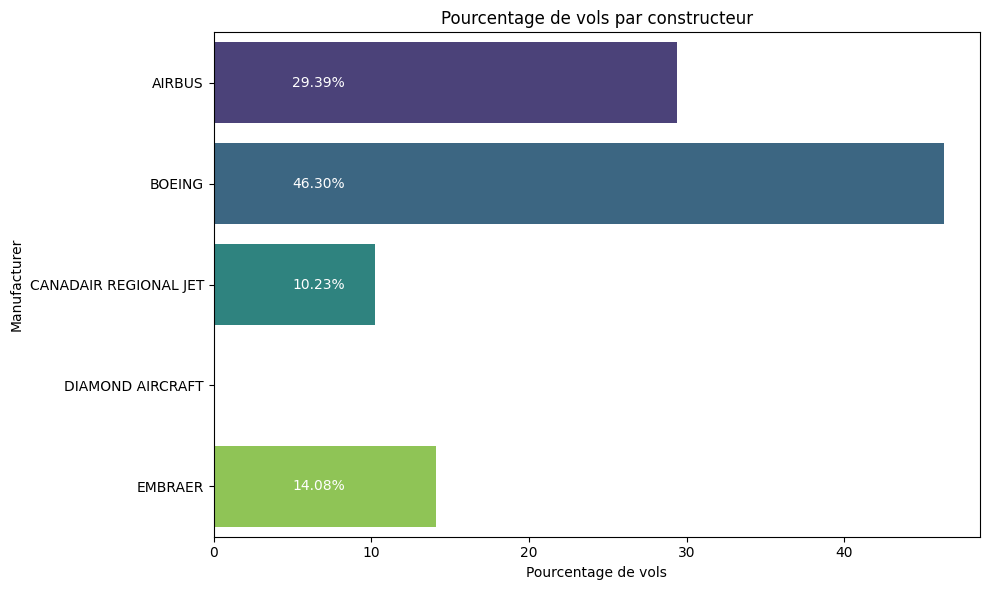

In [29]:
# Calcul du nombre de vols par constructeur
flight_counts = df_flight.groupby('Manufacturer')['index'].count()

# Calcul des pourcentages de vols constructeur
flight_percentages = (flight_counts / total_flights) * 100

# Graphique à barres horizontales avec les pourcentages affichés en bas et en blanc
plt.figure(figsize=(10, 6))  
sns.barplot(x=flight_percentages.values, y=flight_percentages.index, palette="viridis")  # Utilisation de barplot avec les valeurs de l'axe x et les labels de l'axe y

plt.title('Pourcentage de vols par constructeur')
plt.xlabel('Pourcentage de vols')

# Affichage des pourcentages à l'abscisse 5
for i, value in enumerate(flight_percentages.values):
    plt.text(5, i, f"{value:.2f}%", ha='left', va='center', color='white')

plt.tight_layout()  # Ajustement automatique de la disposition pour éviter les chevauchements
plt.show()

**Focus sur les retards**

In [30]:
# Création d'un dataset pour l'analyse des vols uniquement retardés
only_late_flight = df_flight[df_flight['Arr_Delay'] > 0].copy()

# Comptage du nombre de vols en retards
count_late_flight = len(only_late_flight)

# Recherche du vols le plus retardé
Delay_max = round(only_late_flight['Arr_Delay'].max(),2) 

# Affichage des informations chiffrées
print(f"- {count_late_flight} vols sont concernés par un retard a l'attérisage, soit {round((count_late_flight * 100) / len(df_flight),2)} %")

print(f"\n- La moyenne des retards pour les vols concernés est de {round(only_late_flight['Arr_Delay'].mean(),2)} minutes pour une valeur médiane de {round(only_late_flight['Arr_Delay'].median(),2)} minutes")

print(f"\n- Le retard maximum est de {Delay_max} minutes, soit {round(Delay_max/60,2)} heures")


- 2472530 vols sont concernés par un retard a l'attérisage, soit 36.67 %

- La moyenne des retards pour les vols concernés est de 41.54 minutes pour une valeur médiane de 18.0 minutes

- Le retard maximum est de 4405 minutes, soit 73.42 heures


En observant la distribution des retards par leur fréquence, nous obtenons **une distribution classique des retards** autour de la moyenne de 41 minutes et avec un étallement régulier des fréquences vers le maximum de 4405 minutes.

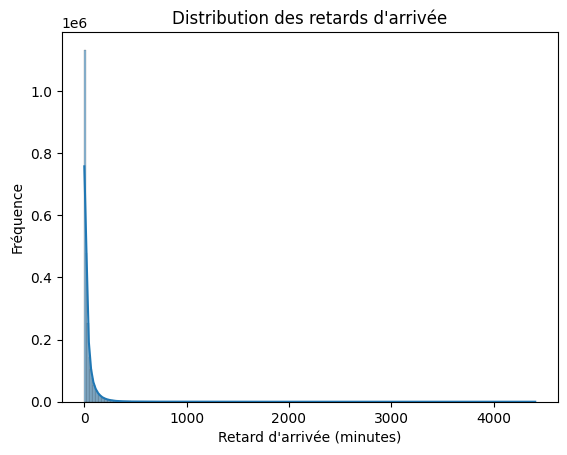

In [12]:
# Distribution des retards d'arrivée

sns.histplot(data=only_late_flight, x='Arr_Delay', bins=300, kde=True)

# Ajout des titres et des libellés
plt.title('Distribution des retards d\'arrivée')
plt.xlabel('Retard d\'arrivée (minutes)')
plt.ylabel('Fréquence')

# Affichage
plt.show()

Idem pour la répartition mensuelle des retards d'arrivée ou nous observons **une faible saisonnalité l'été de juin a aout**.

Inversement le moi de **novembre est le moins impacté** par les retards.

Nous remarquons aussi **une première corrélation possible entre l'impact des retards de départs sur les retards d'arrivées**.

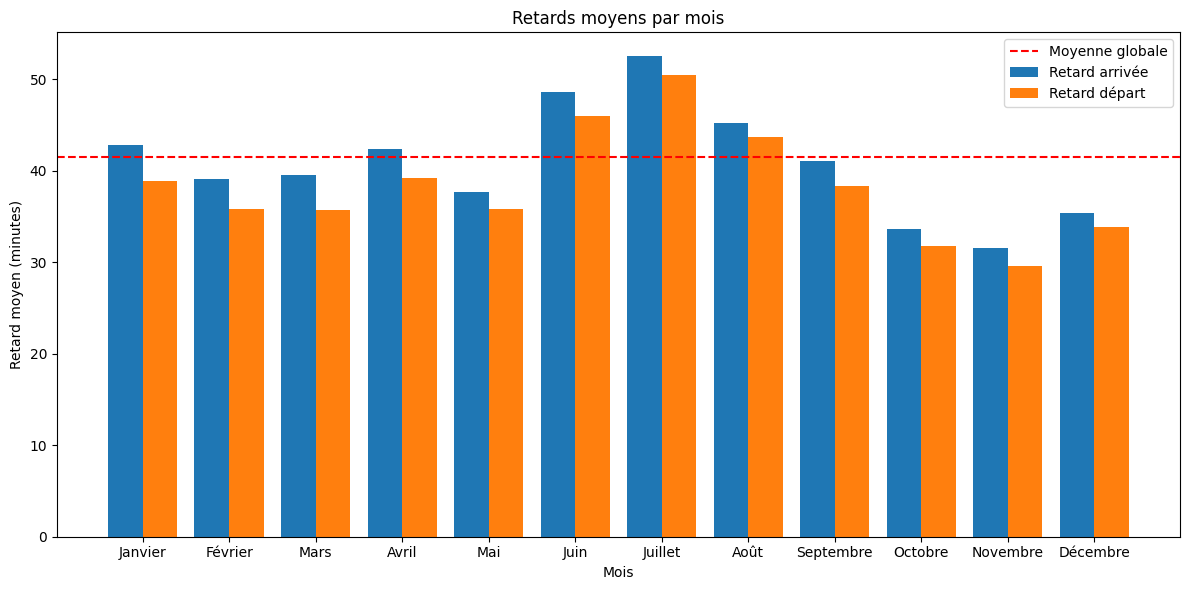

In [36]:
# Groupement des données par mois et calcul des retards moyens pour chaque mois
only_late_flight['Month'] = only_late_flight['FlightDate'].dt.month
monthly_delay = only_late_flight.groupby('Month')['Arr_Delay'].mean()
monthly_dep_delay = only_late_flight.groupby('Month')['Dep_Delay'].mean()  # Calcul des retards moyens au départ par mois

# Calcul de la moyenne globale des retards d'arrivée
global_mean_arrival = only_late_flight['Arr_Delay'].mean()

plt.figure(figsize=(12, 6))

# Graphique en barres des retards moyens d'arrivée par mois
plt.bar(monthly_delay.index, monthly_delay.values, width=0.4, label='Retard arrivée')

# Graphique en barres des retards moyens au départ par mois
plt.bar(monthly_dep_delay.index + 0.4, monthly_dep_delay.values, width=0.4, label='Retard départ')

# Ajout de la moyenne globale des retards d'arrivée en une ligne
plt.axhline(y=global_mean_arrival, color='r', linestyle='--', label='Moyenne globale')

# Ajout des titres et des libellés
plt.title('Retards moyens par mois')
plt.xlabel('Mois')
plt.ylabel('Retard moyen (minutes)')

# Modification des étiquettes pour afficher les noms des mois
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
plt.xticks(monthly_delay.index + 0.2, [months[i-1] for i in monthly_delay.index])

plt.legend()

plt.tight_layout()
plt.show()

Coté compagnies aériennes, **Airbus cumul le plus de retards moyens** a l'inverse de **Boeing qui génère le moins de retards moyens** cumulés.

**Les différentes problématiques techniques rencontrées par Boeing (et largement diffusées dans les médias), n'ont donc pas d'impact sur les données 2023**. 

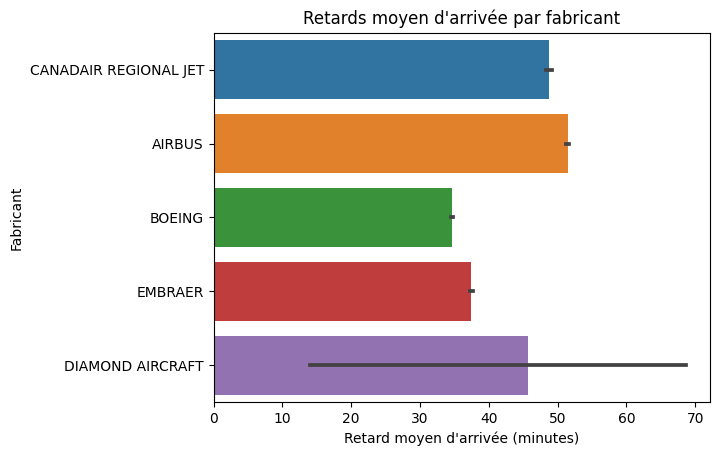

In [14]:
# Graphique en barre horizontal des retards moyen d'arrivée par fabricant

sns.barplot(data=only_late_flight, y='Manufacturer', x='Arr_Delay')

# Ajout des titres et des libellés
plt.title('Retards moyen d\'arrivée par fabricant')
plt.xlabel('Retard moyen d\'arrivée (minutes)')
plt.ylabel('Fabricant')

plt.show()

**Observons la concentration des retards de départ avec un ranking par aéroport (top 20)**

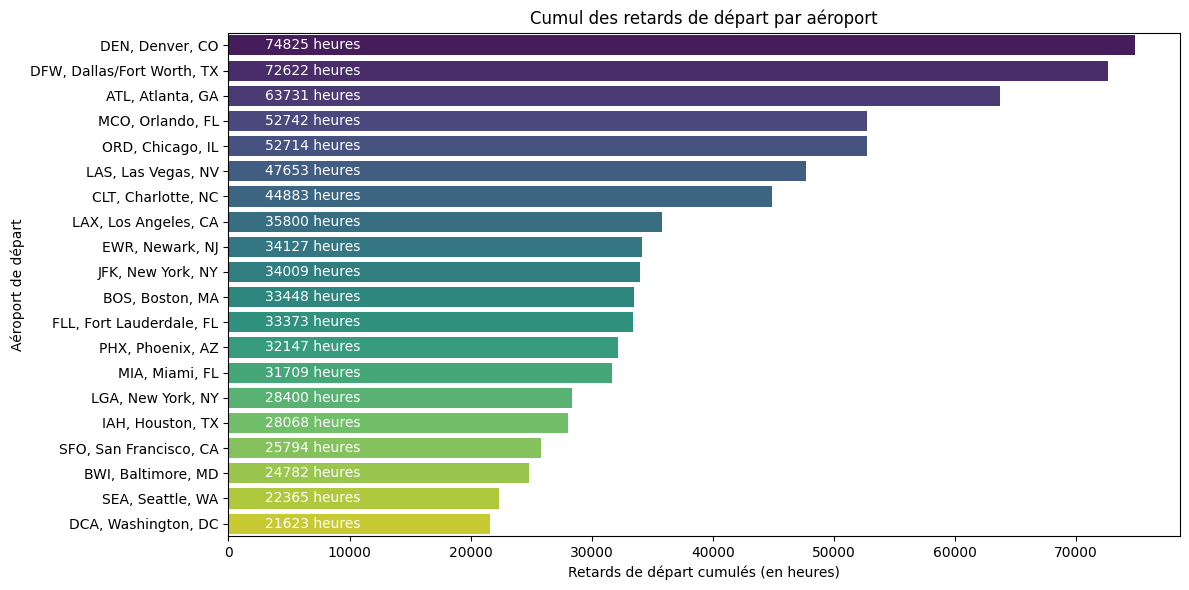

,index,Dep_Airport,Dep_CityName,Dep_Delay,Dep_Airport_City
0,91,DEN,"Denver, CO",74825,"DEN, Denver, CO"
1,92,DFW,"Dallas/Fort Worth, TX",72622,"DFW, Dallas/Fort Worth, TX"
2,21,ATL,"Atlanta, GA",63731,"ATL, Atlanta, GA"
3,204,MCO,"Orlando, FL",52742,"MCO, Orlando, FL"
4,238,ORD,"Chicago, IL",52714,"ORD, Chicago, IL"
5,182,LAS,"Las Vegas, NV",47653,"LAS, Las Vegas, NV"
6,70,CLT,"Charlotte, NC",44883,"CLT, Charlotte, NC"
7,184,LAX,"Los Angeles, CA",35800,"LAX, Los Angeles, CA"
8,112,EWR,"Newark, NJ",34127,"EWR, Newark, NJ"
9,173,JFK,"New York, NY",34009,"JFK, New York, NY"


In [56]:
# Calcul du cumul + ranking des retards de départ par aéroport
Airports_delays = df_flight.groupby(['Dep_Airport','Dep_CityName']).agg({'Dep_Delay' : 'sum'}).reset_index()
Airports_delays = Airports_delays.sort_values(by='Dep_Delay', ascending=False).head(20).reset_index()
Airports_delays['Dep_Delay'] = (Airports_delays['Dep_Delay']/60).astype(int)

# Concaténation des colonnes 'Dep_Airport' et 'Dep_CityName'
Airports_delays['Dep_Airport_City'] = Airports_delays['Dep_Airport'].str.cat(Airports_delays['Dep_CityName'], sep=', ')

# Graphique à barres horizontales avec le cumul des retards de départ par aéroport
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=Airports_delays['Dep_Delay'], y=Airports_delays['Dep_Airport_City'], palette="viridis")

plt.title('Cumul des retards de départ par aéroport')
plt.xlabel('Retards de départ cumulés (en heures)')
plt.ylabel('Aéroport de départ')

# Affichage des pourcentages à l'abscisse maximale
max_delay = Airports_delays['Dep_Delay'].max()
for i, value in enumerate(Airports_delays['Dep_Delay']):
    plt.text(3000, i, f"{value} heures", ha='left', va='center', color='white')

plt.tight_layout()
plt.show()

Airports_delays

Nous avons identifié et quantifié les retards, passons maintenant a une analyse plus poussée des liens de dépendance entre les différentes variables de ce dataset. 

# 3 - Liens de dépendances

Nous avons remarqué a plusieurs reprise **un possible lien de dépendance entre les retards de départ et d'arrivée**. Qu'en est il réellement ?

En utilisant une droite de regression linéaire (polynome de degré 1), on observe que **les retards de départs et d'arrivées sont très fortement corrélés** (coef :0.97/1)

Il faut maintenant comprendre l'origine de ces retards de départ en analysant ses liens de dépendance avec les autres données numériques + les données catégorielles tel que la période de départ dans la journée et le type de vol.

In [ ]:
# Déclaration des colonnes a étudier
x = df_flight['Dep_Delay']
y = df_flight['Arr_Delay']

# Recherche de la ligne de régression linéaire (polynôme de degré 1) dans les données
pente, ordonnee_origine = np.polyfit(x, y, 1)

# Calcule du coefficient de corrélation
correlation = np.corrcoef(x, y)[0, 1]

# Tracer le nuage de points et la droite de régression linéaire
plt.scatter(x, y, label='Données')
plt.plot(x, pente * x + ordonnee_origine, color='orange', label='Droite de régression linéaire')

# Ajouter le coefficient de corrélation sur le graphique
plt.text(x.min(), y.max(), f'Coef de corrélation: {correlation:.2f}', verticalalignment='top')

# Ajouter des légendes et un titre
plt.xlabel('Dep_Delay')
plt.ylabel('Arr_Delay')
plt.title('Analyse de corrélation entre ')

# Déplacer la légende vers le coin supérieur droit
plt.legend(loc='lower right')

# Afficher le graphique
plt.grid(True)
plt.show()

La **heatmap de corrélation des retards au départ** nous apprends qu'il existe :
- une **forte corrélation positive** de 0.72 avec les **retards dus aux compagnies aériennes** (Carrier Delay)
- une **forte corrélation positive** de 0.63 avec l'**attente de l'avion suite a son dernier vol** (LastAircraft Delay)
- des corrélations plus faible de + 0.27 et + 0.24 pour les retards liés a la météo et au controle aérien

Inversement , il n'existe **aucun liens** entre les retards au décollage et le **jour de la semaine**, la **période de la journée**,  la **durée du vol**, l'**age de l'avion** et son **fabricant**. Idem pour les problèmes de **controle de sécurité**. Nous ne nous intéresserons donc plus a ces données.

In [ ]:
dummy_columns1 = pd.get_dummies(df_flight['DepTime_label'], prefix='DepTime', dtype=int)

# Concaténation des variables dummy avec le dataframe original
df_flight = pd.concat([df_flight, dummy_columns1], axis=1)

dummy_columns2 = pd.get_dummies(df_flight['Distance_type'], prefix='Distance', dtype=int)

# Concaténation des variables dummy avec le dataframe original
df_flight = pd.concat([df_flight, dummy_columns2], axis=1)

dummy_columns3 = pd.get_dummies(df_flight['Manufacturer'], prefix='Manufac', dtype=int)

# Concaténation des variables dummy avec le dataframe original
df_flight = pd.concat([df_flight, dummy_columns3], axis=1)                       
                       
# Calcul de la matrice de corrélation
correlation_matrix = df_flight.select_dtypes('number').corr()

# Calcul de la matrice de corrélation
correlation_matrix = df_flight.select_dtypes('number').corr()

# Extraction de la corrélation de 'Dep_Delay'
Dep_Delay_corr = correlation_matrix['Dep_Delay']

# Affichage de la corrélation de 'Dep_Delay'
plt.figure(figsize=(2, 15))  
heatmap = sns.heatmap(Dep_Delay_corr.to_frame(), annot=True, cmap='coolwarm', center=0, fmt=".2f")  
heatmap.set_xticklabels(heatmap.get_xticklabels())  
plt.title('Heatmap de corrélation de la variable "Retards au départ"\n') 
plt.show()

# 4 - Rien ne sert de courir...

Observons de plus près la répartition des retards de départs par compagnie.

Il apparait effectivement que certaine compagnies cumulent plus de retards au départ.

C'est le cas d'**American Airlines** qui **se démarque par la multitude de retards hors normes** suppérieurs a 33h.  

In [ ]:
# Suppression des colonnes dummies inutiles
df_flight = df_flight.drop(df_flight.iloc[:, 24:36], axis=1)

plt.figure(figsize=(12, 8))  # Largeur = 12 pouces, Hauteur = 8 pouces

# Utilisation d'une palette de couleurs prédéfinie dans Seaborn
palette = 'muted'

# Création du stripplot avec la palette de couleurs spécifiée
ax3 = sns.stripplot(y='Airline', x="Dep_Delay", size=3, palette=palette,
                    data=df_flight, linewidth=0.25, jitter=True)

# Ajustement de la taille de police des étiquettes d'axe
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), fontsize=10)

# Formatage des étiquettes de l'axe x pour afficher les heures et les minutes
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in ax3.get_xticks()])

# Définition du label de l'axe x
plt.xlabel('\nRetards aux décollages', fontsize=12)

# Masquage du label de l'axe y
ax3.yaxis.label.set_visible(False)

# Ajustement de la disposition du graphique
plt.tight_layout(w_pad=3)

# Affichage du graphique
plt.show()

Faisons le paralelle avec le nombre d'aéroports visités pour ces longs retards.

Ces chiffres laissent apparaitre des forts **retards aux décollages** (+ 16h) qui **ne peuvent être attribués aux aéroports** puisqu'ils sont répartis sur 265 sites.

Il n'y a donc pas de point d'engorgement a ce niveau. Idem pour les très forts retards avec 60 aéroports de départ pour seulement 118 vols.

In [ ]:
print("Informations sur les retards de plus de 16 heures et 40 minutes :")
print("\nNombre de vols :", df_flight[df_flight['Dep_Delay'] > 984].shape[0],' soit',round((((df_flight[df_flight['Dep_Delay'] > 984].shape[0]) / len(df_flight))*100),4),'%')
print("Nombre d'aéroports concernés :", df_flight[df_flight['Dep_Delay'] > 984]['Dep_Airport'].nunique(),' sur',df_flight['Dep_Airport'].nunique())

print("\nInformations sur les retards de plus de 33 heures et 20 minutes :")
print("\nNombre de vols :", df_flight[df_flight['Dep_Delay'] > 1992].shape[0],' soit',round((((df_flight[df_flight['Dep_Delay'] > 1992].shape[0]) / len(df_flight))*100),4),'%')
print("Nombre d'aéroports concernés :", df_flight[df_flight['Dep_Delay'] > 1992]['Dep_Airport'].nunique(),' sur',df_flight['Dep_Airport'].nunique())

**Existe il des données manquantes dans les retards ?**

Si nous filtrons le dataset pour obtenir le cumul des causes de retards par vol, nous trouvons **un différienciel temps entre les retards cumulés et le retard final** a l'arrivée.

Cette absence de données est vrai pour plus d'1 Million de vols soit exactement **16.10 % de vol contenant des retards non expliqués**.

Il est nécessaire de documenter ces retards pour ne pas biaiser notre analyse.


In [ ]:
df_flight[((df_flight['Delay_Carrier'] + df_flight['Delay_LastAircraft'] + df_flight['Delay_Weather'] + df_flight['Delay_NAS'] + df_flight['Delay_Security']) != df_flight['Arr_Delay']) & (df_flight['Arr_Delay'] > 0) ][['FlightDate','Delay_Carrier','Delay_Weather','Delay_NAS','Delay_Security','Delay_LastAircraft', 'Dep_Delay', 'Arr_Delay']]

Ce nouveau dataset fait apparaitre le cumul des retards rencontrés pouvant expliquer les retards de décollage et d'attérissage.

**Description des données ajoutées :**

- **Delay_Missing** : Retards présents dans les données mais non renseignés
- **Sum_Delays** : Cumul des retards renseignés + non renseignés (Ne tiens pas compte du retard au décollage et a l'attérissage)
- **Absorption_delay** : Capacité de la compagnie aérienne a absorber ses retards




In [ ]:
# Extraction du dataset des retards appelé 'Delay_view'
Delay_view = df_flight.loc[:,('FlightDate','Delay_Carrier','Delay_Weather','Delay_NAS','Delay_Security','Delay_LastAircraft', 'Dep_Delay', 'Arr_Delay')]

# Initialisation de la nouvelle colonne 'Delay_Missing'
Delay_view['Delay_Missing'] = 0

# Ajout de la colonne somme des 'retards documentés'
Delay_view['Sum_Delay'] = (Delay_view['Delay_Carrier'] +
                           Delay_view['Delay_LastAircraft'] +
                           Delay_view['Delay_Weather'] +
                           Delay_view['Delay_NAS'] +
                           Delay_view['Delay_Security'])

# Initialisation de la nouvelle colonne 'Absorption_Delay'
Delay_view['Absorption_Delay'] = 0

# Fonction de calcul des données des retards manquants

Delay_view['Delay_Missing'] = Delay_view.apply(lambda x: x['Arr_Delay'] if (x['Sum_Delay'] == 0) & (x['Arr_Delay'] > 0) else 0, axis=1)
Delay_view['Absorption_Delay'] = Delay_view.apply(lambda x: (x['Dep_Delay'] - x['Arr_Delay']) if (x['Sum_Delay'] > x['Arr_Delay']) & (x['Dep_Delay'] > 0) else 0, axis=1)
# Mise a jour de 'Sum_Delay' 
Delay_view['Sum_Delay'] = Delay_view['Sum_Delay'] + Delay_view['Delay_Missing']

# Affichage des données cibles
Delay_view.head(20)

Nous pouvons maintenant observer ces retards par compagnie aérienne en cumulant l'ensemble des retards bruts (sans prendre en compte les potentielles avances en vol).

In [ ]:
import plotly.graph_objects as go

# Concatenation des nouvelles colonne avec le dataset d'origine (df_flight)                                              
df_flight = pd.concat([df_flight, Delay_view[['Sum_Delay', 'Delay_Missing', 'Absorption_Delay']]], axis=1)

# Regroupement et agrégation des données
Airline_delay = df_flight.groupby('Airline').agg({
    'Dep_Delay': 'mean',
    'Arr_Delay': 'mean',
    'Sum_Delay': 'mean',
    'Delay_Carrier': 'mean',
    'Delay_LastAircraft': 'mean',
    'Delay_Weather': 'mean',
    'Delay_NAS': 'mean',
    'Delay_Security': 'mean',
    'Delay_Missing': 'mean',
    'Absorption_Delay': 'mean',
})

Sum_Delay_Mean = df_flight['Sum_Delay'].mean()

# Ajout du nombre de vols à partir du comptage des occurrences dans la colonne 'Airline'
Airline_delay['Number_of_flights'] = df_flight['Airline'].value_counts()

# Tri des données en fonction de la moyenne des retards cumulés ('Sum_Delay') et réinitialisation de l'index
Airline_delay = Airline_delay.sort_values(by='Sum_Delay', ascending=False).reset_index()

# Création du graphique en barres empilées horizontales
fig = px.bar(Airline_delay, x='Airline', y=['Delay_Carrier', 'Delay_LastAircraft', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_Missing'],
             title='Cumul des retards (brut) par compagnie aérienne', barmode='stack', labels={'value': 'Cumul des retards', 'variable': 'Type de retard'},
             color_discrete_sequence=px.colors.qualitative.Vivid)  

# Ajout de la ligne horizontale représentant la moyenne de la somme des retards
fig.add_shape(type="line",
    x0=-1, x1=15,
    y0=Sum_Delay_Mean, y1=Sum_Delay_Mean,
    line=dict(color="red", width=2, dash="dash")
)

# Ajout de l'annotation pour l'intitulé de la moyenne globale
fig.add_annotation(x=13, y=(Sum_Delay_Mean +1 ), text="Moyenne globale", showarrow=False, font=dict(color='red', size=12))

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Sous cette forme, il apparrait que les retards (brut) par compagnie sont effectivement **fortements dépendants des retards 'Carrier'**, **'Last Aircraft'** et **'NAS'**.

Nous obtenons un **ranking des compagnies** les plus sujettes aux retards cumulés.

Observons maintenant leur **capacité a absorber ces retards** en vol.


In [ ]:
Airline_absorption = Airline_delay.sort_values(by='Absorption_Delay', ascending=False).reset_index()

Airline_absorption[['Airline','Sum_Delay','Absorption_Delay']]

# Melt du DataFrame pour avoir une seule colonne pour les valeurs de délai
#melted_df = pd.melt(Airline_absorption, id_vars=['Airline'], value_vars=['Sum_Delay', 'Absorption_Delay'],
#                    var_name='Delay_Type', value_name='Delay')

# Création du barplot
#fig = px.bar(melted_df, x='Airline', y='Delay', color='Delay_Type', barmode='group',
#             title="Classement des compagnies aériennes par leur capacité d'abosption des retards",
#             labels={'Delay': 'Cumul des retards VS Absorption des retards', 'Delay_Type': 'Legende'})
#fig.update_layout(xaxis_tickangle=-45)
#fig.show()

In [ ]:
import plotly.express as px

# Calcul du pourcentage de retard pour chaque compagnie
Airline_delay['Pourcentage_Retard'] = (Airline_delay['Retard_Net'] / Airline_delay['Retard_Net'].sum()) * 100

# Tri des données en fonction du retard net
Airline_delay = Airline_delay.sort_values(by='Retard_Net', ascending=False)

# Création du graphique en barres empilées horizontales avec le pourcentage de retard
fig = px.bar(Airline_delay, x='Airline', y='Retard_Net',
             title='Cumul des retards (Net) par compagnie aérienne avec pourcentage de retard',
             labels={'value': 'Cumul des retards', 'variable': 'Type de retard'},
             color_discrete_sequence=px.colors.qualitative.Vivid,
             text=Airline_delay['Pourcentage_Retard'].round(2).astype(str) + '%',  # Formatage du pourcentage avec le caractère '%'
             hover_data={'Pourcentage_Retard': False},  # Désactivation de l'information au survol pour éviter la redondance
             )

# Personnalisation de l'angle des étiquettes sur l'axe x
fig.update_layout(xaxis_tickangle=-45)

# Affichage du graphique
fig.show()